<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [54]:
##Write your code here
# sorted(df.columns.tolist())

df['Industry'] = df['Industry'].fillna(value=df['Industry'].mode()[0])

industry_gb = \
df.groupby('Industry')['ResponseId'].count().sort_values(ascending=False)

industry_gb

Industry
Software Development                          48497
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: ResponseId, dtype: int64

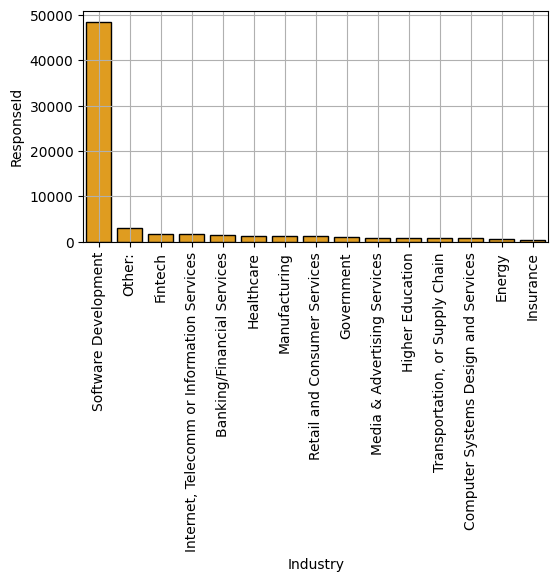

In [57]:
fig = plt.figure(figsize=(6,3))
sns.barplot(industry_gb, color='orange', edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.grid()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [23]:
# df['ConvertedCompYearly'].unique().tolist()

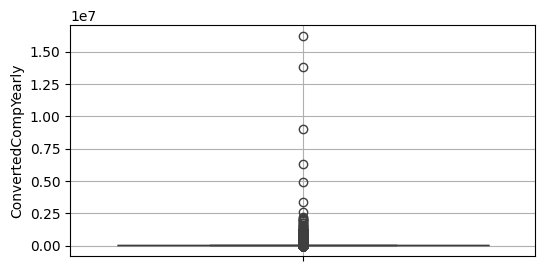

In [46]:
fig = plt.figure(figsize=(6,3))
sns.boxplot(df['ConvertedCompYearly'])

plt.xticks(rotation=90)
plt.grid()
plt.show()

In [12]:
##Write your code here

df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(value=df['ConvertedCompYearly'].mode()[0])

df['ConvertedCompYearly'].aggregate({'mean', 'median', 'std'}).round(2)

mean       72219.48
median     64444.00
std       112245.09
Name: ConvertedCompYearly, dtype: float64

In [24]:
compo_mean = df['ConvertedCompYearly'].mean()
compo_std = df['ConvertedCompYearly'].std()

print(compo_mean, compo_std)

72219.4789645002 112245.08993757048


In [25]:
zscores = (df['ConvertedCompYearly'] - compo_mean)/compo_std

print(zscores.head())
print(zscores.tail())

0   -0.069272
1   -0.069272
2   -0.069272
3   -0.069272
4   -0.069272
Name: ConvertedCompYearly, dtype: float64
65432   -0.069272
65433   -0.069272
65434   -0.069272
65435   -0.069272
65436   -0.069272
Name: ConvertedCompYearly, dtype: float64


In [31]:
# zscores.unique().tolist()
# zscores[20000:20023]

outliers_bool = (zscores > 3)

outliers_bool.value_counts()

ConvertedCompYearly
False    65243
True       194
Name: count, dtype: int64

In [33]:
outliers_df = df.loc[outliers_bool, :]

outliers_df.shape

(194, 114)

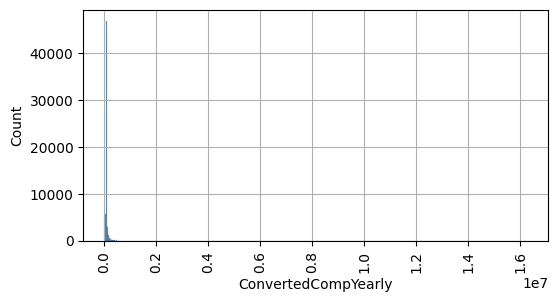

In [37]:
fig = plt.figure(figsize=(6,3))
sns.histplot(df['ConvertedCompYearly'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [39]:
outliers_df_cleaned = df.loc[~outliers_bool, :]

print(df.shape)
print(outliers_df_cleaned.shape)

(65437, 114)
(65243, 114)


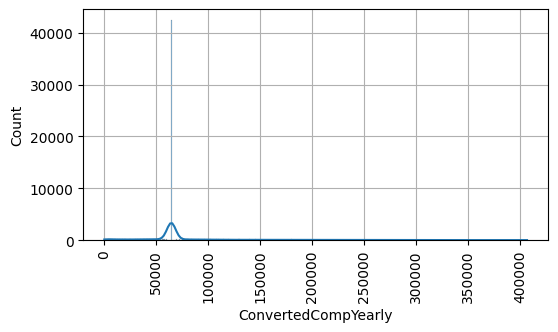

In [42]:
fig = plt.figure(figsize=(6,3))
sns.histplot(outliers_df_cleaned['ConvertedCompYearly'], kde=True)
plt.xticks(rotation=90)
plt.grid()
plt.show()

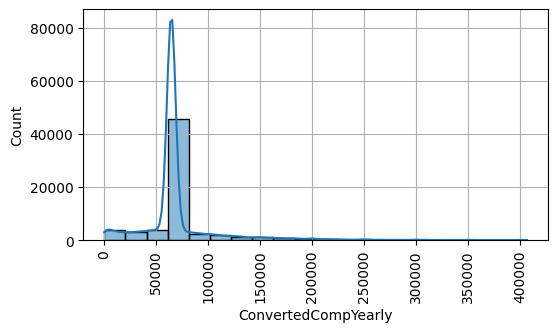

In [45]:
fig = plt.figure(figsize=(6,3))
sns.histplot(data=outliers_df_cleaned, x='ConvertedCompYearly', 
             bins=20, kde=True, log_scale=False)
plt.xticks(rotation=90)
plt.grid()
plt.show()

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [58]:
import numpy as np
import pandas as pd

def detect_outliers_iqr(data_series, threshold=1.5):
    """
    Detect outliers using the IQR method.
    
    Parameters:
    - data_series: Pandas Series (e.g., df['ConvertedCompYearly'])
    - threshold: Multiplier for IQR (default 1.5, use 3 for extreme outliers)
    
    Returns:
    - Boolean Series where True = outlier
    """
    # Calculate quartiles and IQR
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Identify outliers
    outliers = (data_series < lower_bound) | (data_series > upper_bound)
    
    print(f"IQR: {IQR:.2f}")
    print(f"Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"Outliers detected: {outliers.sum()} ({(outliers.mean()*100):.1f}%)")
    
    return outliers

# Usage example:
outliers_iqr = detect_outliers_iqr(df['ConvertedCompYearly'], threshold=1.5)

# Filter DataFrame
cleaned_df = df[~outliers_iqr]  # Tilde (~) inverts the condition

IQR: 0.00
Bounds: [64444.00, 64444.00]
Outliers detected: 23114 (35.3%)


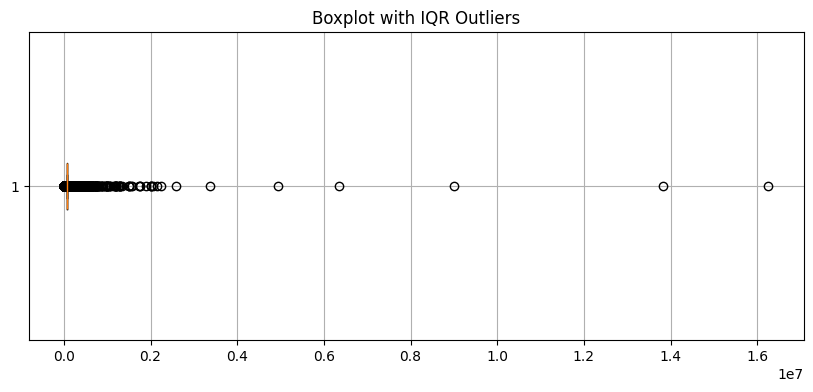

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.boxplot(df['ConvertedCompYearly'].dropna(), vert=False)
plt.title("Boxplot with IQR Outliers")
plt.grid()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [63]:
##Write your code here
# Filter DataFrame
cleaned_df = df[~outliers_iqr]  # Tilde (~) inverts the condition

cleaned_df.shape

(42323, 114)

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [66]:
##Write your code here

df['Age'].unique().tolist()

['Under 18 years old',
 '35-44 years old',
 '45-54 years old',
 '18-24 years old',
 '25-34 years old',
 '55-64 years old',
 'Prefer not to say',
 '65 years or older']

In [67]:
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': np.nan  # Handle missing data
}

df['Age_mapped'] = df['Age'].map(age_mapping)

df['Age_mapped']

0        16.0
1        39.5
2        49.5
3        21.0
4        21.0
         ... 
65432    21.0
65433    29.5
65434    29.5
65435    21.0
65436    21.0
Name: Age_mapped, Length: 65437, dtype: float64

In [72]:
number_vars = df.select_dtypes(include='number')

full_corrs = \
number_vars.corr()

In [73]:
# Select only numeric columns (excluding 'Age_mapped' itself)
numeric_cols = df.select_dtypes(include='number').columns.drop('Age_mapped')

# Compute correlations between Age_mapped and other numerics
age_correlations = df[numeric_cols].corrwith(df['Age_mapped'])

In [74]:
age_correlations 

ResponseId            -0.037967
CompTotal             -0.002761
WorkExp                0.850655
JobSatPoints_1        -0.027908
JobSatPoints_4        -0.076032
JobSatPoints_5        -0.101475
JobSatPoints_6        -0.050228
JobSatPoints_7        -0.082683
JobSatPoints_8        -0.046092
JobSatPoints_9        -0.081633
JobSatPoints_10       -0.114350
JobSatPoints_11       -0.107092
ConvertedCompYearly    0.071174
JobSat                 0.069844
dtype: float64

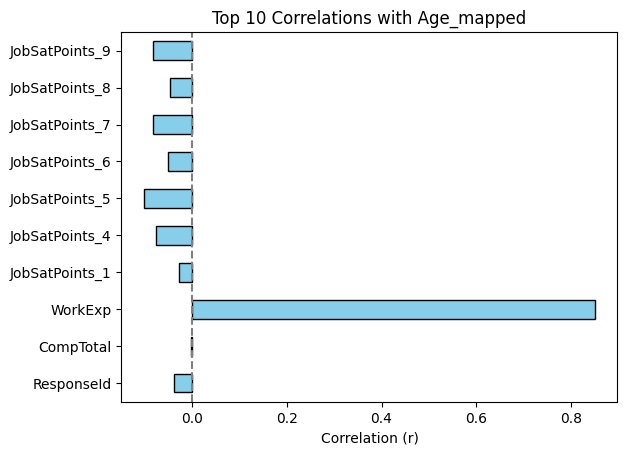

In [78]:

# Plot top N correlations
top_n = 10
age_correlations.head(top_n).plot.barh(
    title=f'Top {top_n} Correlations with Age_mapped',
    color='skyblue', edgecolor='black'
)
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel('Correlation (r)')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
